# 3. Feature Engineering and Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, learning_curve
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import reuters
from nltk import bigrams, trigrams
from collections import Counter, defaultdict

In [2]:
# Load Data
cleaned = pd.read_csv('Cleaned.csv')[['text']].values.ravel()#This set was added in much later and is a little cleaner
tweets = pd.read_csv('CleanedDisasterTweets.csv')[['Text']].values.ravel()
target = pd.read_csv('TargetDisasterTweets.csv')[['target']].values.ravel()

# Train and Test sets
tweets_train, tweets_test, target_train, target_test = train_test_split(tweets, target, random_state = 0)
cleaned_train, cleaned_test, target_train, target_test = train_test_split(cleaned, target, random_state = 0)

# CountVectorizer unigram Train features

In [3]:
cv_uni = CountVectorizer(analyzer='word', strip_accents = 'ascii', ngram_range = (1,1))
cv_uni_train =cv_uni.fit_transform(tweets_train)
df_cv_train = pd.DataFrame(cv_uni_train.toarray(), columns=cv_uni.get_feature_names())
df_cv_train.head()

,aa,aaaa,aaaaaaallll,aaarrrgghhh,aaemiddleaged,aampb,aampw,aashiqui,ab,aba,...,zonewolf,zoom,zotar,zouma,zourryart,zss,zumiez,zurich,zxathetis,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TfidfVectorizer unigram Train features

In [4]:
tfid_uni = TfidfVectorizer(sublinear_tf=True, strip_accents = 'ascii', ngram_range = (1,1))
tfid_uni_train = tfid_uni.fit_transform(tweets_train)
df_tfid_train = pd.DataFrame.sparse.from_spmatrix(tfid_uni_train, columns = tfid_uni.get_feature_names())
df_tfid_train.head()

,aa,aaaa,aaaaaaallll,aaarrrgghhh,aaemiddleaged,aampb,aampw,aashiqui,ab,aba,...,zonewolf,zoom,zotar,zouma,zourryart,zss,zumiez,zurich,zxathetis,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Unigram Test features

In [5]:
cv_uni_test = cv_uni.transform(tweets_test)
tfid_uni_test = tfid_uni.transform(tweets_test)

In [6]:
print('CountVectorizer Train features shape:', cv_uni_train.shape, '| TfidVectorizer Train features shape:', tfid_uni_train.shape, 
      '\nCountVectorizer Test features shape: ', cv_uni_test.shape, '| TfidVectorizer Test features shape: ', tfid_uni_test.shape)

CountVectorizer Train features shape: (5627, 17778) | TfidVectorizer Train features shape: (5627, 17778) 
CountVectorizer Test features shape:  (1876, 17778) | TfidVectorizer Test features shape:  (1876, 17778)


# Bigram features

In [7]:
# CountVectorizer bigram features
cv_bi =CountVectorizer(analyzer='word', strip_accents = 'ascii', ngram_range = (2,2))
cv_bi_train =cv_bi.fit_transform(tweets_train)
cv_bi_test = cv_bi.transform(tweets_test)

# TfidfVectorizer bigram features
tfid_bi = TfidfVectorizer(sublinear_tf=True, strip_accents = 'ascii', ngram_range = (2,2))
tfid_bi_train = tfid_bi.fit_transform(tweets_train)
tfid_bi_test = tfid_bi.transform(tweets_test)

print('CountVectorizer Train features shape:', cv_bi_train.shape, '| TfidVectorizer Train features shape:', tfid_bi_train.shape, 
      '\nCountVectorizer Test features shape: ', cv_bi_test.shape, '| TfidVectorizer Test features shape: ', tfid_bi_test.shape)

CountVectorizer Train features shape: (5627, 42035) | TfidVectorizer Train features shape: (5627, 42035) 
CountVectorizer Test features shape:  (1876, 42035) | TfidVectorizer Test features shape:  (1876, 42035)


# Unigram and Bigram features

In [8]:
# CountVectorizer Uni and Bi features
cv_uni_bi = CountVectorizer(analyzer='word', strip_accents = 'ascii', ngram_range = (1,2))
cv_uni_bi_train = cv_uni_bi.fit_transform(tweets_train)
cv_uni_bi_test = cv_uni_bi.transform(tweets_test)

# TfidVectorizer Uni and Bi features
tfid_uni_bi = TfidfVectorizer(sublinear_tf=True, strip_accents = 'ascii', ngram_range = (1,2))
tfid_uni_bi_train = tfid_uni_bi.fit_transform(tweets_train)
tfid_uni_bi_test = tfid_uni_bi.transform(tweets_test)

print('CountVectorizer Train features shape:', cv_uni_bi_train.shape, '| TfidVectorizer Train features shape:', tfid_uni_bi_train.shape, 
      '\nCountVectorizer Test features shape: ', cv_uni_bi_test.shape, '| TfidVectorizer Test features shape: ', tfid_uni_bi_test.shape)

CountVectorizer Train features shape: (5627, 59813) | TfidVectorizer Train features shape: (5627, 59813) 
CountVectorizer Test features shape:  (1876, 59813) | TfidVectorizer Test features shape:  (1876, 59813)


# Full GridSearchCV 

In [9]:
# steps = [('cv', CountVectorizer()), 
#          ('log', LogisticRegression(random_state = 0))]

# pipe = Pipeline(steps)

# params = {'cv__strip_accents':['ascii', 'unicode'],
#           'cv__ngram_range':[(1,1), (1,2)],
#           'log__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#           'log__C':np.logspace(-2, 2, 50)}

# gs = GridSearchCV(pipe, params, cv=5).fit(tweets_train, target_train)
# gs.best_params_
# best_logreg_c = gs.best_params_['log__C']
# best_logreg_score = gs.best_score_

# print('Best C param:', best_logreg_c, '\nBest score:', best_logreg_score)

# output for best_params_: 'ascii', (1,1), 'saga', 0.20235896477251566, 

# LogisticRegression with CountVectorizer features 

In [10]:
# Uni features, liblinear
max_c = 0.20235896477251566
log = LogisticRegression(solver = 'liblinear', C = max_c, random_state = 0)
log.fit(cv_uni_train, target_train)
log_cv_uni_prediction = log.predict(cv_uni_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, log_cv_uni_prediction, target_names = labels, digits = 5))
log_cv_uni_lib = classification_report(target_test, log_cv_uni_prediction, target_names = labels, output_dict = True)
pd.DataFrame(confusion_matrix(target_test, log_cv_uni_prediction), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet    0.78834   0.90385   0.84215      1092
Disaster Tweet    0.83173   0.66199   0.73722       784

      accuracy                        0.80277      1876
     macro avg    0.81003   0.78292   0.78968      1876
  weighted avg    0.80647   0.80277   0.79830      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,987,105
Disaster Tweet,265,519


In [11]:
# Uni features, saga
log_saga = LogisticRegression(solver = 'saga', C = max_c, random_state = 0)
log_saga.fit(cv_uni_train, target_train)
log_cv_uni_saga_prediction = log_saga.predict(cv_uni_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, log_cv_uni_saga_prediction, target_names = labels, digits = 5))
log_cv_uni_saga = classification_report(target_test, log_cv_uni_saga_prediction, target_names = labels, output_dict = True)
pd.DataFrame(confusion_matrix(target_test, log_cv_uni_saga_prediction), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet    0.78926   0.90201   0.84188      1092
Disaster Tweet    0.82962   0.66454   0.73796       784

      accuracy                        0.80277      1876
     macro avg    0.80944   0.78328   0.78992      1876
  weighted avg    0.80613   0.80277   0.79845      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,985,107
Disaster Tweet,263,521


In [12]:
# uni, lbfgs, 
log_lbfgs = LogisticRegression(solver = 'lbfgs', C = max_c, random_state = 0)
log_lbfgs.fit(cv_uni_train, target_train)
log_cv_uni_lbfgs_prediction = log_lbfgs.predict(cv_uni_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, log_cv_uni_lbfgs_prediction, target_names = labels, digits = 5))
log_cv_uni_lbfgs = classification_report(target_test, log_cv_uni_lbfgs_prediction, target_names = labels, output_dict = True)
pd.DataFrame(confusion_matrix(target_test, log_cv_uni_lbfgs_prediction), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet    0.78834   0.90385   0.84215      1092
Disaster Tweet    0.83173   0.66199   0.73722       784

      accuracy                        0.80277      1876
     macro avg    0.81003   0.78292   0.78968      1876
  weighted avg    0.80647   0.80277   0.79830      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,987,105
Disaster Tweet,265,519


LogisticRegression solver seems to has very little effect on the scores. We will continue with `saga` as it produces the highest F1 for Disaster Tweets. 

In [13]:
# Uni and Bi features
log = LogisticRegression(solver = 'saga', C = max_c, random_state = 0).fit(cv_uni_bi_train, target_train)
log_cv_uni_bi_prediction = log.predict(cv_uni_bi_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, log_cv_uni_bi_prediction, target_names = labels, digits = 5))
log_cv_uni_bi = classification_report(target_test, log_cv_uni_bi_prediction, target_names = labels, output_dict = True)
pd.DataFrame(confusion_matrix(target_test, log_cv_uni_bi_prediction), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet    0.77977   0.91758   0.84308      1092
Disaster Tweet    0.84772   0.63903   0.72873       784

      accuracy                        0.80117      1876
     macro avg    0.81374   0.77831   0.78590      1876
  weighted avg    0.80816   0.80117   0.79529      1876



C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


,Safe Tweet,Disaster Tweet
Safe Tweet,1002,90
Disaster Tweet,283,501


In [14]:
# Bi features
log = LogisticRegression(solver = 'saga', C = max_c, random_state = 0)
log.fit(cv_bi_train, target_train)
log_cv_bi_prediction = log.predict(cv_bi_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, log_cv_bi_prediction, target_names = labels, digits = 5))
log_cv_bi = classification_report(target_test, log_cv_bi_prediction, target_names = labels, output_dict = True)
pd.DataFrame(confusion_matrix(target_test, log_cv_bi_prediction), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet    0.68115   0.97619   0.80241      1092
Disaster Tweet    0.91640   0.36352   0.52055       784

      accuracy                        0.72015      1876
     macro avg    0.79877   0.66986   0.66148      1876
  weighted avg    0.77946   0.72015   0.68462      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,1066,26
Disaster Tweet,499,285


Only vectorizing bigrams clearly results inthe worst set of features among the three given the detection of Disaster Tweets is the lowest with an F1 score of 0.52 

# LogisticRegression with TfidVectorizer features

In [15]:
# Uni features
log = LogisticRegression(solver = 'saga', C = max_c, random_state = 0).fit(tfid_uni_train, target_train)
log_tfid_uni_prediction = log.predict(tfid_uni_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, log_tfid_uni_prediction, target_names = labels, digits = 5))
log_tfid_uni = classification_report(target_test, log_tfid_uni_prediction, target_names = labels, output_dict = True)
pd.DataFrame(confusion_matrix(target_test, log_tfid_uni_prediction), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet    0.72340   0.96520   0.82699      1092
Disaster Tweet    0.90931   0.48597   0.63342       784

      accuracy                        0.76493      1876
     macro avg    0.81636   0.72559   0.73020      1876
  weighted avg    0.80110   0.76493   0.74609      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,1054,38
Disaster Tweet,403,381


In [16]:
# Uni and Bi
log = LogisticRegression(solver = 'saga', C = max_c, random_state = 0)
log.fit(tfid_uni_bi_train, target_train)
log_tfid_uni_bi_prediction = log.predict(tfid_uni_bi_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, log_tfid_uni_bi_prediction, target_names = labels, digits = 5))
log_tfid_uni_bi = classification_report(target_test, log_tfid_uni_bi_prediction, target_names = labels, output_dict = True)
pd.DataFrame(confusion_matrix(target_test, log_tfid_uni_bi_prediction), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet    0.69534   0.98443   0.81501      1092
Disaster Tweet    0.94848   0.39923   0.56194       784

      accuracy                        0.73987      1876
     macro avg    0.82191   0.69183   0.68848      1876
  weighted avg    0.80113   0.73987   0.70925      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,1075,17
Disaster Tweet,471,313


In [17]:
# Bi features
log = LogisticRegression(solver = 'liblinear', C = max_c, random_state = 0)
log.fit(tfid_bi_train, target_train)
log_tfid_bi_prediction = log.predict(tfid_bi_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, log_tfid_bi_prediction, target_names = labels, digits = 5))
log_tfid_bi = classification_report(target_test, log_tfid_bi_prediction, target_names = labels, output_dict = True)
pd.DataFrame(confusion_matrix(target_test, log_tfid_bi_prediction), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet    0.62948   0.99725   0.77179      1092
Disaster Tweet    0.97945   0.18240   0.30753       784

      accuracy                        0.65672      1876
     macro avg    0.80447   0.58983   0.53966      1876
  weighted avg    0.77574   0.65672   0.57777      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,1089,3
Disaster Tweet,641,143


CountVectorizer outperformed Tfid features using LogisticRegression. Also, using only Bigrams is clearly not useful.

# RandomForest 

In [18]:
# steps = [('cv', CountVectorizer(strip_accents = 'ascii', ngram_range=(1,2))), 
#          ('rf', RandomForestClassifier(n_jobs = -1, random_state = 0))]

# pipe = Pipeline(steps)

# params = {'rf__n_estimators':list(range(100, 201))}

# gs = GridSearchCV(pipe, params, cv=5).fit(tweets_train, target_train)

# best results: n_estimators = 193

In [19]:
# rf = RandomForestClassifier(n_jobs = -1, random_state = 0)

# params = {'n_estimators':list(range(186, 201))}

# gs = GridSearchCV(rf, params, cv=5).fit(cv_uni_train, target_train)
# gs.best_params_

# best_params_: n_estimators = 199

In [20]:
# CountVectorizer uni features
rf = RandomForestClassifier(n_estimators = 199, n_jobs = -1, random_state = 0).fit(cv_uni_train, target_train)
rf_predict = rf.predict(cv_uni_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, rf_predict, target_names = labels, digits = 5))
rf_cv_uni = classification_report(target_test, rf_predict, target_names = labels, output_dict = True)
pd.DataFrame(confusion_matrix(target_test, rf_predict), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet    0.77901   0.90385   0.83680      1092
Disaster Tweet    0.82759   0.64286   0.72362       784

      accuracy                        0.79478      1876
     macro avg    0.80330   0.77335   0.78021      1876
  weighted avg    0.79931   0.79478   0.78950      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,987,105
Disaster Tweet,280,504


In [21]:
# CountVectorizer uni and bi features
rf = RandomForestClassifier(n_estimators = 199, n_jobs = -1, random_state = 0).fit(cv_uni_bi_train, target_train)
rf_predict = rf.predict(cv_uni_bi_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, rf_predict, target_names = labels, digits = 5))
rf_cv_uni_bi = classification_report(target_test, rf_predict, target_names = labels, output_dict = True)
pd.DataFrame(confusion_matrix(target_test, rf_predict), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet    0.75557   0.93132   0.83429      1092
Disaster Tweet    0.85849   0.58036   0.69254       784

      accuracy                        0.78465      1876
     macro avg    0.80703   0.75584   0.76342      1876
  weighted avg    0.79858   0.78465   0.77505      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,1017,75
Disaster Tweet,329,455


In [22]:
# TfidVectorizer uni features
rf = RandomForestClassifier(n_estimators = 199, n_jobs = -1, random_state = 0).fit(tfid_uni_train, target_train)
rf_predict = rf.predict(tfid_uni_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, rf_predict, target_names = labels, digits = 5))
rf_tfid_uni = classification_report(target_test, rf_predict, target_names = labels, digits = 5)
pd.DataFrame(confusion_matrix(target_test, rf_predict), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet    0.79698   0.86996   0.83187      1092
Disaster Tweet    0.79240   0.69133   0.73842       784

      accuracy                        0.79531      1876
     macro avg    0.79469   0.78064   0.78515      1876
  weighted avg    0.79506   0.79531   0.79282      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,950,142
Disaster Tweet,242,542


This model did that best at detecting Disaster Tweets

In [23]:
# TfidVectorizer uni and bi features
rf = RandomForestClassifier(n_estimators = 199, n_jobs = -1, random_state = 0).fit(tfid_uni_bi_train, target_train)
rf_predict = rf.predict(tfid_uni_bi_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, rf_predict, target_names = labels, digits = 5))
rf_tfid_uni_bi = classification_report(target_test, rf_predict, target_names = labels, output_dict = True)
pd.DataFrame(confusion_matrix(target_test, rf_predict), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet    0.79034   0.88370   0.83441      1092
Disaster Tweet    0.80611   0.67347   0.73384       784

      accuracy                        0.79584      1876
     macro avg    0.79822   0.77858   0.78413      1876
  weighted avg    0.79693   0.79584   0.79238      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,965,127
Disaster Tweet,256,528


# Support Vector Machine  

In [24]:
sv = SVC(random_state = 0)
# params = {'C':np.logspace(-2,2,50)}
# svm = GridSearchCV(sv, params, cv = 5)
sv.fit(cv_uni_train, target_train)
sv_pred = sv.predict(cv_uni_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, sv_pred, target_names = labels, digits = 5))
sv_cv_uni = classification_report(target_test, sv_pred, target_names = labels, output_dict = True)
pd.DataFrame(confusion_matrix(target_test, sv_pred), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet    0.77422   0.92949   0.84478      1092
Disaster Tweet    0.86372   0.62245   0.72350       784

      accuracy                        0.80117      1876
     macro avg    0.81897   0.77597   0.78414      1876
  weighted avg    0.81162   0.80117   0.79409      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,1015,77
Disaster Tweet,296,488


In [25]:
# svm.best_params_
# output: 'C' = 1.93

# Data Quantity Assessment

In [26]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(LogisticRegression(), cv_uni_bi_train, target_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

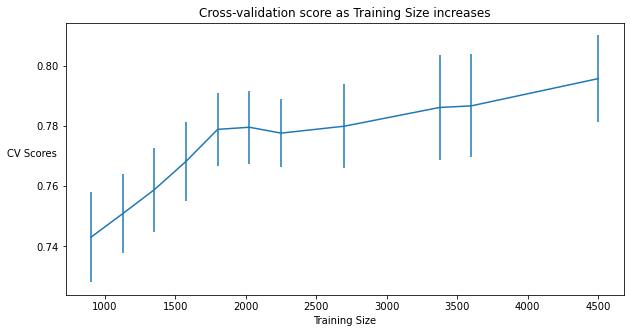

In [27]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training Size')
plt.ylabel('CV Scores', rotation = 0)
plt.title('Cross-validation score as Training Size increases');

The gradual increase in score implies that more data could be beneficial but considering the score increased by about only 2% from around 2000 to 4500 entries, an additional 2500 entries will almost certainly give less than a 2% increase.  

# LogReg withCleaned Data

In [28]:
# CountVectorizer Uni and Bi features on Cleaned Set
cv_uni_bi = CountVectorizer(analyzer='word', strip_accents = 'ascii', ngram_range = (1,2))
cv_clean_uni_bi_train = cv_uni_bi.fit_transform(cleaned_train)
cv_clean_uni_bi_test = cv_uni_bi.transform(cleaned_test)

# TfidVectorizer Uni and Bi features on Cleaned Set
tfid_uni_bi = TfidfVectorizer(sublinear_tf=True, strip_accents = 'ascii', ngram_range = (1,2))
tfid_clean_uni_bi_train = tfid_uni_bi.fit_transform(cleaned_train)
tfid_clean_uni_bi_test = tfid_uni_bi.transform(cleaned_test)

# print('CountVectorizer Train features shape:', cv_uni_bi_train.shape, '| TfidVectorizer Train features shape:', tfid_uni_bi_train.shape, 
#       '\nCountVectorizer Test features shape: ', cv_uni_bi_test.shape, '| TfidVectorizer Test features shape: ', tfid_uni_bi_test.shape)

In [29]:
# CountVectorizer Uni features on Cleaned Set
cv = CountVectorizer(analyzer='word', strip_accents = 'ascii', ngram_range = (1,1))
cv_clean_uni_train = cv.fit_transform(cleaned_train)
cv_clean_uni_test = cv.transform(cleaned_test)

# TfidVectorizer Uni features on Cleaned Set
tfid = TfidfVectorizer(sublinear_tf=True, strip_accents = 'ascii', ngram_range = (1,1))
tfid_clean_uni_train = tfid.fit_transform(cleaned_train)
tfid_clean_uni_test = tfid.transform(cleaned_test)

# print('CountVectorizer Train features shape:', cv_uni_bi_train.shape, '| TfidVectorizer Train features shape:', tfid_uni_bi_train.shape, 
#       '\nCountVectorizer Test features shape: ', cv_uni_bi_test.shape, '| TfidVectorizer Test features shape: ', tfid_uni_bi_test.shape)

In [30]:
# LogReg, uni/bi, lbfgs, 
log_lbfgs = LogisticRegression(solver = 'lbfgs', C = max_c, random_state = 0)
log_lbfgs.fit(cv_clean_uni_bi_train, target_train)
log_cv_uni_lbfgs_prediction = log_lbfgs.predict(cv_clean_uni_bi_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, log_cv_uni_lbfgs_prediction, target_names = labels, digits = 5))
log_clean_cv_uni_bi_lbfgs = classification_report(target_test, log_cv_uni_lbfgs_prediction, target_names = labels, output_dict = True)
pd.DataFrame(confusion_matrix(target_test, log_cv_uni_lbfgs_prediction), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet    0.78884   0.90659   0.84363      1092
Disaster Tweet    0.83575   0.66199   0.73879       784

      accuracy                        0.80437      1876
     macro avg    0.81230   0.78429   0.79121      1876
  weighted avg    0.80845   0.80437   0.79982      1876



,Safe Tweet,Disaster Tweet
Safe Tweet,990,102
Disaster Tweet,265,519


In [31]:
# uni and bi, saga 
log = LogisticRegression(solver = 'saga', C = max_c, random_state = 0)
log.fit(cv_clean_uni_bi_train, target_train)
log_cv_uni_prediction = log.predict(cv_clean_uni_bi_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, log_cv_uni_prediction, target_names = labels, digits = 5))
log_clean_cv_uni_bi_saga = classification_report(target_test, log_cv_uni_prediction, target_names = labels, output_dict = True)
pd.DataFrame(confusion_matrix(target_test, log_cv_uni_prediction), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet    0.79757   0.90201   0.84658      1092
Disaster Tweet    0.83307   0.68112   0.74947       784

      accuracy                        0.80970      1876
     macro avg    0.81532   0.79157   0.79803      1876
  weighted avg    0.81241   0.80970   0.80600      1876



C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


,Safe Tweet,Disaster Tweet
Safe Tweet,985,107
Disaster Tweet,250,534


In [32]:
# LogReg, uni, saga 
log = LogisticRegression(solver = 'saga', C = max_c, random_state = 0)
log.fit(cv_clean_uni_train, target_train)
log_cv_uni_lbfgs_prediction = log.predict(cv_clean_uni_test)
labels = ['Safe Tweet', 'Disaster Tweet']
print(classification_report(target_test, log_cv_uni_lbfgs_prediction, target_names = labels, digits = 5))
log_clean_cv_uni_saga = classification_report(target_test, log_cv_uni_lbfgs_prediction, target_names = labels, output_dict = True)
pd.DataFrame(confusion_matrix(target_test, log_cv_uni_lbfgs_prediction), index=labels, columns=labels)

                precision    recall  f1-score   support

    Safe Tweet    0.79690   0.89469   0.84297      1092
Disaster Tweet    0.82308   0.68240   0.74616       784

      accuracy                        0.80597      1876
     macro avg    0.80999   0.78854   0.79457      1876
  weighted avg    0.80784   0.80597   0.80251      1876



C:\Users\trent\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


,Safe Tweet,Disaster Tweet
Safe Tweet,977,115
Disaster Tweet,249,535


The cleaner data set marginally increased detection of Safe Tweets but had zero impact on the detection of Disaster Tweets. Saga analyzer worked best

# Results

dataframe that compares log solvers <br> dataframe that compares cv and tfid features <br> dataframe that compares algorithms <br> dataframe that compares gram features

In [34]:
log_clean_cv_uni_bi_saga

{'Safe Tweet': {'precision': 0.7975708502024291,
  'recall': 0.902014652014652,
  'f1-score': 0.8465835840137516,
  'support': 1092},
 'Disaster Tweet': {'precision': 0.8330733229329174,
  'recall': 0.6811224489795918,
  'f1-score': 0.7494736842105264,
  'support': 784},
 'accuracy': 0.8097014925373134,
 'macro avg': {'precision': 0.8153220865676732,
  'recall': 0.7915685504971219,
  'f1-score': 0.798028634112139,
  'support': 1876},
 'weighted avg': {'precision': 0.812407704477857,
  'recall': 0.8097014925373134,
  'f1-score': 0.8060003423049411,
  'support': 1876}}

In [35]:
pd.DataFrame(log_clean_cv_uni_bi_saga)

,Safe Tweet,Disaster Tweet,accuracy,macro avg,weighted avg
precision,0.797571,0.833073,0.809701,0.815322,0.812408
recall,0.902015,0.681122,0.809701,0.791569,0.809701
f1-score,0.846584,0.749474,0.809701,0.798029,0.806000
support,1092.000000,784.000000,0.809701,1876.000000,1876.000000


In [37]:
log_solvers = {'F1_Score': {
    'lbfgs': np.mean((log_cv_uni_lbfgs['Safe Tweet']['f1-score'],log_cv_uni_lbfgs['Disaster Tweet']['f1-score'])), 
    'saga': np.mean((log_cv_uni_saga['Safe Tweet']['f1-score'],log_cv_uni_saga['Disaster Tweet']['f1-score'])), 
    'liblinear': np.mean((log_cv_uni_lib['Safe Tweet']['f1-score'],log_cv_uni_lib['Disaster Tweet']['f1-score']))
},
               'Accuracy': {
    'lbfgs': log_cv_uni_lbfgs['accuracy'], 
    'saga': log_cv_uni_saga['accuracy'], 
    'liblinear': log_cv_uni_lib['accuracy']
               }}

log_solvers_df = pd.DataFrame(log_solvers)
log_solvers_df

,F1_Score,Accuracy
lbfgs,0.789683,0.802772
saga,0.789920,0.802772
liblinear,0.789683,0.802772


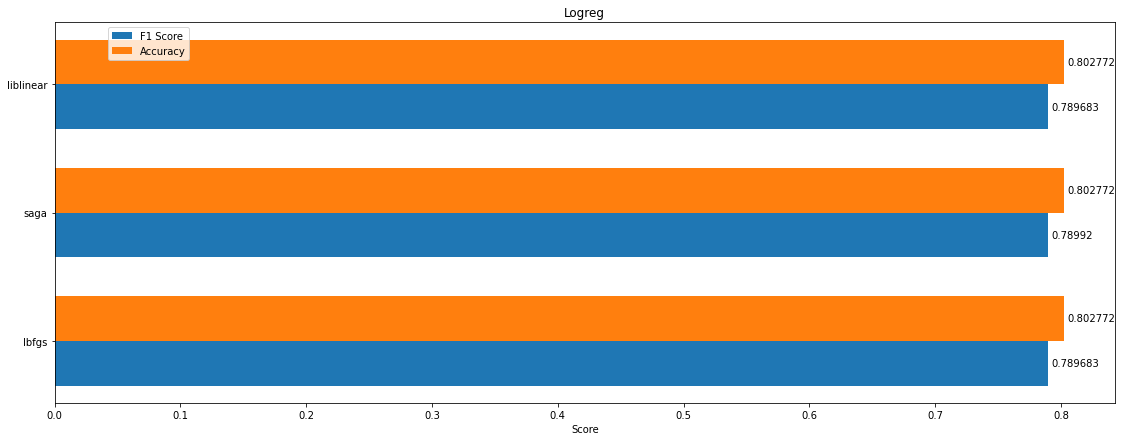

In [39]:
labels = list(log_solvers_df.index)
f1_score = log_solvers_df.F1_Score.values
accuracy = log_solvers_df.Accuracy.values

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (19,7))

rects1 = ax.barh(x - width/2, f1_score, width, label='F1 Score')
rects2 = ax.barh(x + width/2, accuracy, width, label='Accuracy')

ax.set_xlabel('Score')
ax.set_title('LogisticRegression Solvers')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend(loc = (.05,.9))

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.show()

In [42]:
algorithms = {'F1_Score': {
    'LogReg': np.mean((log_cv_uni_saga['Safe Tweet']['f1-score'],log_cv_uni_saga['Disaster Tweet']['f1-score'])),
    'RandFor': np.mean((rf_cv_uni['Safe Tweet']['f1-score'],rf_cv_uni['Disaster Tweet']['f1-score'])),  
    'SVM': np.mean((sv_cv_uni['Safe Tweet']['f1-score'],sv_cv_uni['Disaster Tweet']['f1-score']))
},
               'Accuracy': {
    'LogReg': log_cv_uni_saga['accuracy'], 
    'RandFor': rf_cv_uni['accuracy'], 
    'SVM': sv_cv_uni['accuracy']
               }}

algorithms_df = pd.DataFrame(algorithms)
algorithms_df

,F1_Score,Accuracy
LogReg,0.789920,0.802772
RandFor,0.780207,0.794776
SVM,0.784138,0.801173


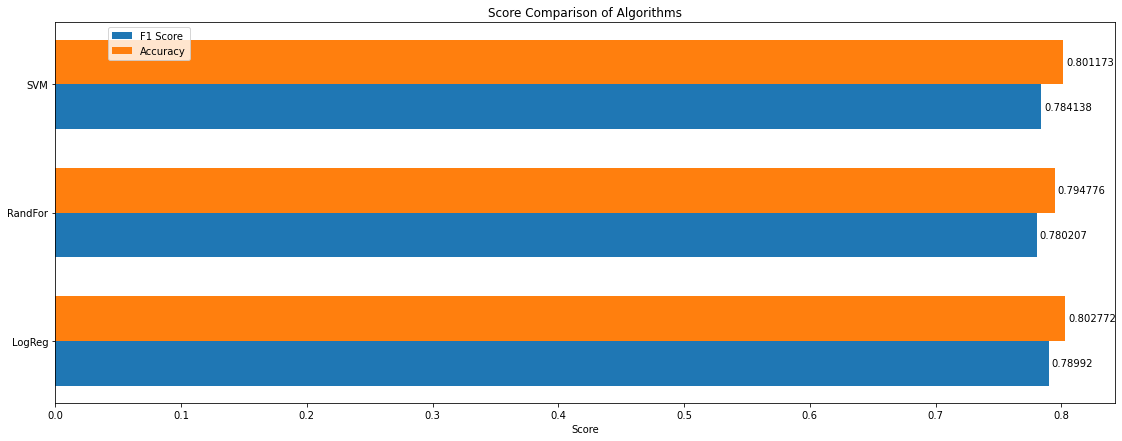

In [44]:
labels = list(algorithms_df.index)
f1_score = algorithms_df.F1_Score.values
accuracy = algorithms_df.Accuracy.values

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (19,7))

rects1 = ax.barh(x - width/2, f1_score, width, label='F1 Score')
rects2 = ax.barh(x + width/2, accuracy, width, label='Accuracy')

ax.set_xlabel('Score')
ax.set_title('Score Comparison of Algorithms')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend(loc = (.05,.9))

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.show()